In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline

In [2]:
print(pc.__version__)

0.9.2


In [3]:
Min = pc.CloudyInput('../models/M1')
Min.set_BB(Teff=43600, lumi_unit='Q(H)', lumi_value=49.34)
Min.set_cste_density(4)
Min.set_radius(16)
Min.set_abund(predef='ism', nograins=False)
#Min.set_stop(('zone = 1'))
Min.set_other(('Cosmic Rays Background'))

In [4]:
Min.print_input()

In [5]:
!cat ../models/M1.in

////////////////////////////////////
title M1
////////////////////////////////////
set punch prefix "M1"
Blackbody 43600.000000
Q(H) = 49.340
radius = 16.000
hden = 4.000
filling factor = 1.0
abundances ism
Cosmic Rays Background
save last radius ".rad"
save last continuum ".cont"
save last physical conditions ".phy"
save last overview ".ovr"
save last heating ".heat"
save last cooling ".cool"
save last optical depth ".opd"
save last grain temperature ".gtemp"
save last grain abundances ".gabund"
save last grain D/G ratio ".gdgrat"
save last element hydrogen ".ele_H"
save last element helium ".ele_He"
save last element carbon ".ele_C"
save last element nitrogen ".ele_N"
save last element oxygen ".ele_O"
save last element argon ".ele_Ar"
save last element neon ".ele_Ne"
save last element sulphur ".ele_S"
save last element chlorin ".ele_Cl"
save last element iron ".ele_Fe"
save last element silicon ".ele_Si"


In [6]:
# You need to add the path to the directory where cloudy.exe is to your default paths.
# Or define it:
pc.config.cloudy_exe = '/usr/local/Cloudy/c17.00/source/cloudy.exe'

In [7]:
Min.run_cloudy()

In [39]:
M = pc.CloudyModel('../models/M1', read_emis=False)

In [9]:
M.print_stats()

 Name of the model: ../models/M1
 R_in (cut) = 1.000e+16 (1.000e+16), R_out (cut) = 2.448e+17 (2.448e+17)
 H+ mass = 5.02e-01, H mass = 5.17e-01
 <H+/H> = 0.99, <He++/He> = 0.00, <He+/He> = 0.99
 <O+++/O> = 0.00, <O++/O> = 0.90, <O+/O> = 0.09
 <N+++/O> = 0.10, <N++/O> = 0.83, <N+/O> = 0.07
 T(O+++) = 14059, T(O++) = 10325, T(O+) = 11101
 <ne> = 10698,  <nH> = 10000, T0 = 10404, t2=0.0034
 <log U> = -0.55


In [10]:
print(M.abund)

{'H': 0.0, 'He': -1.0088, 'C': -3.6003, 'N': -4.1002, 'O': -3.4962, 'F': -7.699, 'Ne': -3.9101, 'Na': -6.5003, 'Mg': -4.8996, 'Al': -7.1002, 'Si': -5.5003, 'P': -6.7959, 'S': -4.4895, 'Cl': -7.0, 'Ar': -5.5498, 'K': -7.9586, 'Ca': -9.3872, 'Ti': -9.2366, 'Cr': -8.0, 'Mn': -7.6383, 'Fe': -6.2, 'Co': -8.2291, 'Ni': -7.7399, 'Cu': -8.8239, 'Zn': -7.699}


In [11]:
M.out

{'###First': ' ####  1  Te:1.813E+04 Hden:1.000E+04 Ne:1.198E+04 R:1.004E+16 R-R0:4.476E+13 dR:8.953E+13 NTR:  5 Htot:7.589E-16 T912: 1.38e-03###\n',
 '###Last': ' ####259  Te:3.975E+03 Hden:1.000E+04 Ne:1.929E+02 R:2.448E+17 R-R0:2.348E+17 dR:1.590E+13 NTR: 11 Htot:1.639E-18 T912: 1.56e+02###\n',
 'Blackbody': '                       * Blackbody 43600.000000                                                          *\n',
 'Chem1': '        H :  0.0000  He: -1.0088  Li:-10.2676  B :-10.0506  C : -3.6003  N : -4.1002  O : -3.4962  F : -7.6990  Ne: -3.9101\n',
 'Chem2': '        Na: -6.5003  Mg: -4.8996  Al: -7.1002  Si: -5.5003  P : -6.7959  S : -4.4895  Cl: -7.0000  Ar: -5.5498  K : -7.9586\n',
 'Chem3': '        Ca: -9.3872  Ti: -9.2366  V :-10.0000  Cr: -8.0000  Mn: -7.6383  Fe: -6.2000  Co: -8.2291  Ni: -7.7399  Cu: -8.8239\n',
 'Chem4': '                                                            Zn: -7.6990\n',
 'Cloudy ends': ' Cloudy ends: 259 zones, 1 iteration, 3 cautions. (sin

In [13]:
print(M.get_ab_ion_vol('O',2))
print(M.get_ab_ion_vol_ne('O',2))

0.877819846268
0.900374883356


In [16]:
print(M.log_U_mean, M.log_U_mean_ne)

-0.554631563099 -0.542019637814


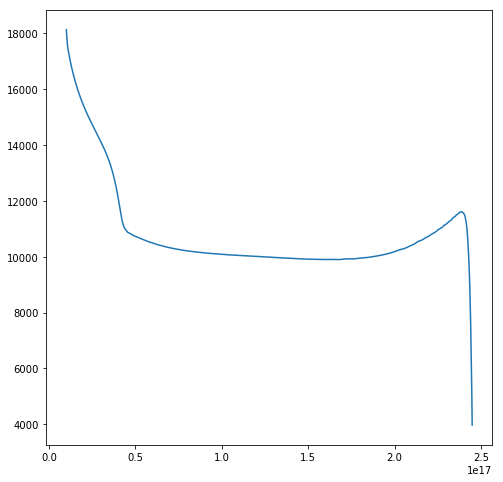

In [24]:
f, ax = plt.subplots(figsize=(8,8))
ax.plot(M.radius, M.te)

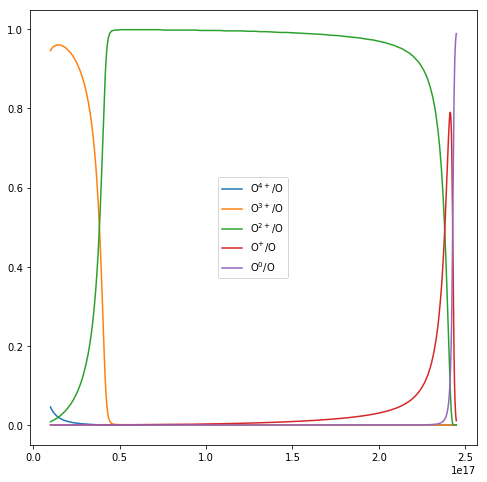

In [40]:
f, ax = plt.subplots(figsize=(8,8))
ax.plot(M.radius, M.get_ionic('O',4), label=r'O$^{4+}$/O')
ax.plot(M.radius, M.get_ionic('O',3), label=r'O$^{3+}$/O')
ax.plot(M.radius, M.get_ionic('O',2), label=r'O$^{2+}$/O')
ax.plot(M.radius, M.get_ionic('O',1), label=r'O$^{+}$/O')
ax.plot(M.radius, M.get_ionic('O',0), label=r'O$^{0}$/O')
ax.legend(loc='best')

In [30]:
print(r'<Te>$_{O^0/O.Ne}$ =', M.get_T0_ion_vol_ne('O',0))
print(r'<Te>$_{O^+/O.Ne}$ =', M.get_T0_ion_vol_ne('O',1))
print(r'<Te>$_{O^{2+}/O.Ne}$ =', M.get_T0_ion_vol_ne('O',2))
print(r'<Te>$_{O^{3+}/O.Ne}$ =', M.get_T0_ion_vol_ne('O',3))

<Te>$_{O^0/O.Ne}$ = 10079.9718256
<Te>$_{O^+/O.Ne}$ = 11101.0125748
<Te>$_{O^{2+}/O.Ne}$ = 10324.5182055
<Te>$_{O^{3+}/O.Ne}$ = 14058.6975448


# Grid of models

In [31]:
def make_model(name, radius):
    Min = pc.CloudyInput('../models/{}_{}'.format(name, radius))
    Min.set_BB(Teff=43600, lumi_unit='Q(H)', lumi_value=49.34)
    Min.set_cste_density(4)
    Min.set_radius(radius)
    Min.set_abund(predef='ism', nograins=False)
    Min.set_other(('Cosmic Rays Background'))
    Min.print_input() #We do not run the model, only print the input file

In [32]:
name = 'M1'
for radius in np.linspace(13, 23,6):
    make_model(name, radius)

In [33]:
# This will create a Makefile in the models directory
pc.print_make_file('../models')

In [71]:
pc.run_cloudy(dir_='../models', n_proc=6, use_make=True)

In [34]:
Ms = pc.load_models('../models/M1_', read_emis=False)

In [35]:
for M in Ms:
    print(M.model_name_s, M.out['Cloudy ends'])

M1_13.0  Cloudy ends: 434 zones, 1 iteration, 20 warnings, 3 cautions. (single thread) ExecTime(s) 202.43

M1_15.0  Cloudy ends: 316 zones, 1 iteration, 16 warnings, 4 cautions. (single thread) ExecTime(s) 184.35

M1_17.0  Cloudy ends: 212 zones, 1 iteration, 3 cautions. (single thread) ExecTime(s) 157.17

M1_19.0  Cloudy ends: 112 zones, 1 iteration, 2 cautions. (single thread) ExecTime(s) 61.52

M1_21.0  Cloudy ends: 1 zone, 1 iteration, 7 cautions. (single thread) ExecTime(s) 17.10

M1_23.0  Cloudy ends: 1 zone, 1 iteration, 7 cautions. (single thread) ExecTime(s) 33.80



In [36]:
print('Inner R', ['{:8.2f}'.format(np.log10(M.r_in)) for M in Ms])
print('Outer R', ['{:8.2f}'.format(np.log10(M.r_out)) for M in Ms])
print('<Te>   ', ['{:8.2f}'.format(M.T0) for M in Ms])
print('<logU> ', ['{:8.2f}'.format(M.log_U_mean_ne) for M in Ms])
print('H0/H   ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('H',0)) for M in Ms])
print('H+/H   ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('H',1)) for M in Ms])
print('H2/H   ', ['{:8.2f}'.format(2*M.get_ab_ion_vol_ne('H',2)) for M in Ms])
print('O++/O  ', ['{:8.2f}'.format(M.get_ab_ion_vol_ne('O',2)) for M in Ms])

Inner R ['   13.00', '   15.00', '   17.00', '   19.00', '   21.00', '   23.00']
Outer R ['   17.38', '   17.38', '   17.47', '   19.00', '   21.00', '   23.00']
<Te>    ['10453.11', '10448.20', ' 9910.03', ' 8061.30', '  372.61', '    3.80']
<logU>  ['   -0.50', '   -0.51', '   -0.86', '   -4.24', '   -8.24', '  -12.24']
H0/H    ['    0.01', '    0.01', '    0.01', '    0.25', '    0.97', '    0.02']
H+/H    ['    0.99', '    0.99', '    0.99', '    0.75', '    0.01', '    0.00']
H2/H    ['    0.00', '    0.00', '    0.00', '    0.00', '    0.02', '    0.98']
O++/O   ['    0.90', '    0.90', '    0.91', '    0.00', '    0.00', '    0.00']


(10, 100000000.0)

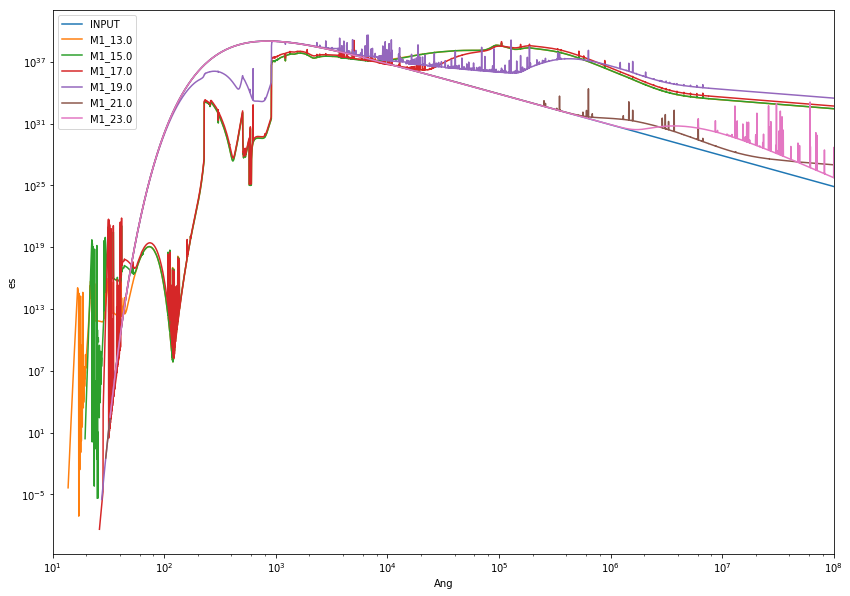

In [37]:
f, ax = plt.subplots(figsize=(14, 10))
M.plot_spectrum(label='INPUT', ax=ax, xunit='Ang', cont='incid')
for M in Ms:
    M.plot_spectrum(label=M.model_name_s, ax=ax, xunit='Ang')
ax.legend()
ax.set_xlim((10, 1e8))